# Incidence du syndrome varicelle

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [8]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [9]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202419          7   9828     5927   13729      15           9   
1     202418          7  13252     9706   16798      20          15   
2     202417          7  15303    11219   19387      23          17   
3     202416          7  18138    13540   22736      27          20   
4     202415          7  24929    17315   32543      37          26   
5     202414          7  16181    12544   19818      24          19   
6     202413          7  18322    14206   22438      27          21   
7     202412          7  12818     9128   16508      19          13   
8     202411          7  15973    12400   19546      24          19   
9     202410          7  14301    10761   17841      21          16   
10    202409          7  14337    10871   17803      21          16   
11    202408          7  15899    11991   19807      24          18   
12    202407          7  11294     8226   14362      17          12   
13    202406          7  12174     9020   15328      18          13   
14    202405          7   8814     6110   11518      13           9   
15    202404          7   9504     6566   12442      14          10   
16    202403          7   6948     4633    9263      10           7   
17    202402          7   7125     4852    9398      11           8   
18    202401          7  13305     9214   17396      20          14   
19    202352          7  11636     7354   15918      18          12   
20    202351          7   6912     4227    9597      10           6   
21    202350          7   8799     6215   11383      13           9   
22    202349          7   7817     5362   10272      12           8   
23    202348          7   7351     4749    9953      11           7   
24    202347          7   6537     4277    8797      10           7   
25    202346          7   5229     2973    7485       8           5   
26    202345          7   5007     2675    7339       8           4   
27    202344          7   3688     1664    5712       6           3   
28    202343          7   3891     1675    6107       6           3   
29    202342          7   3968     1212    6724       6           2   
...      ...        ...    ...      ...     ...     ...         ...   
1715  199126          7  17608    11304   23912      31          20   
1716  199125          7  16169    10700   21638      28          18   
1717  199124          7  16171    10071   22271      28          17   
1718  199123          7  11947     7671   16223      21          13   
1719  199122          7  15452     9953   20951      27          17   
1720  199121          7  14903     8975   20831      26          16   
1721  199120          7  19053    12742   25364      34          23   
1722  199119          7  16739    11246   22232      29          19   
1723  199118          7  21385    13882   28888      38          25   
1724  199117          7  13462     8877   18047      24          16   
1725  199116          7  14857    10068   19646      26          18   
1726  199115          7  13975     9781   18169      25          18   
1727  199114          7  12265     7684   16846      22          14   
1728  199113          7   9567     6041   13093      17          11   
1729  199112          7  10864     7331   14397      19          13   
1730  199111          7  15574    11184   19964      27          19   
1731  199110          7  16643    11372   21914      29          20   
1732  199109          7  13741     8780   18702      24          15   
1733  199108          7  13289     8813   17765      23          15   
1734  199107          7  12337     8077   16597      22          15   
1735  199106          7  10877     7013   14741      19          12   
1736  199105          7  10442     6544   14340      18          11   
1737  199104          7   7913     4563   11263      14           8   
1738  199103          7  15387    10484   20290      27          18   
1739  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [10]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [11]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202419          7   9828     5927   13729      15           9   
1     202418          7  13252     9706   16798      20          15   
2     202417          7  15303    11219   19387      23          17   
3     202416          7  18138    13540   22736      27          20   
4     202415          7  24929    17315   32543      37          26   
5     202414          7  16181    12544   19818      24          19   
6     202413          7  18322    14206   22438      27          21   
7     202412          7  12818     9128   16508      19          13   
8     202411          7  15973    12400   19546      24          19   
9     202410          7  14301    10761   17841      21          16   
10    202409          7  14337    10871   17803      21          16   
11    202408          7  15899    11991   19807      24          18   
12    202407          7  11294     8226   14362      17          12   
13    202406          7  12174     9020   15328      18          13   
14    202405          7   8814     6110   11518      13           9   
15    202404          7   9504     6566   12442      14          10   
16    202403          7   6948     4633    9263      10           7   
17    202402          7   7125     4852    9398      11           8   
18    202401          7  13305     9214   17396      20          14   
19    202352          7  11636     7354   15918      18          12   
20    202351          7   6912     4227    9597      10           6   
21    202350          7   8799     6215   11383      13           9   
22    202349          7   7817     5362   10272      12           8   
23    202348          7   7351     4749    9953      11           7   
24    202347          7   6537     4277    8797      10           7   
25    202346          7   5229     2973    7485       8           5   
26    202345          7   5007     2675    7339       8           4   
27    202344          7   3688     1664    5712       6           3   
28    202343          7   3891     1675    6107       6           3   
29    202342          7   3968     1212    6724       6           2   
...      ...        ...    ...      ...     ...     ...         ...   
1715  199126          7  17608    11304   23912      31          20   
1716  199125          7  16169    10700   21638      28          18   
1717  199124          7  16171    10071   22271      28          17   
1718  199123          7  11947     7671   16223      21          13   
1719  199122          7  15452     9953   20951      27          17   
1720  199121          7  14903     8975   20831      26          16   
1721  199120          7  19053    12742   25364      34          23   
1722  199119          7  16739    11246   22232      29          19   
1723  199118          7  21385    13882   28888      38          25   
1724  199117          7  13462     8877   18047      24          16   
1725  199116          7  14857    10068   19646      26          18   
1726  199115          7  13975     9781   18169      25          18   
1727  199114          7  12265     7684   16846      22          14   
1728  199113          7   9567     6041   13093      17          11   
1729  199112          7  10864     7331   14397      19          13   
1730  199111          7  15574    11184   19964      27          19   
1731  199110          7  16643    11372   21914      29          20   
1732  199109          7  13741     8780   18702      24          15   
1733  199108          7  13289     8813   17765      23          15   
1734  199107          7  12337     8077   16597      22          15   
1735  199106          7  10877     7013   14741      19          12   
1736  199105          7  10442     6544   14340      18          11   
1737  199104          7   7913     4563   11263      14           8   
1738  199103          7  15387    10484   20290      27          18   
1739  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [12]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [13]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [14]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

In [15]:
sorted_data['inc'][0]

1143

Toute la colonne 'inc' est représentée par des chaines de caractères à cause du trait dans la ligne de la semaine 19 de l'année 1989. 

In [16]:
sorted_data['inc'] = sorted_data['inc'].astype(int)

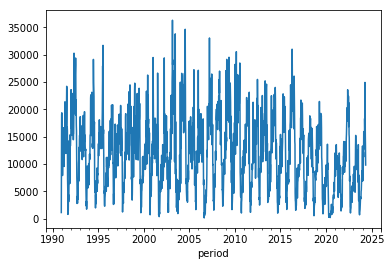

In [17]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

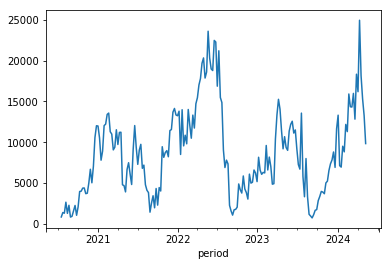

In [18]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de syndrome varicelle est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent en octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [28]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [29]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

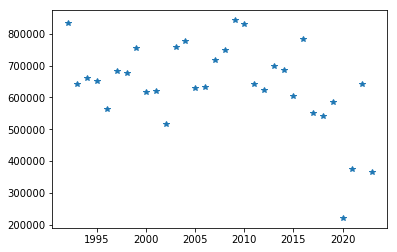

In [30]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [31]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

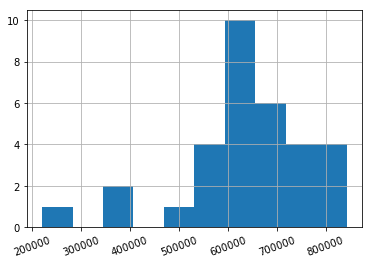

In [32]:
yearly_incidence.hist(xrot=20)